# Week 3 - Day 3  - data structures

In [31]:
%run "boaz_utils.ipynb"

## Shh... secret

In [154]:
sorted([1000,80,234,34,5])

[5, 34, 80, 234, 1000]

In [29]:
def merge(L1,L2):
    result = []
    while (L1 and L2):
        if L1[0]<L2[0]:
            result += [L1[0]]
            L1 = L1[1:]
        else:
            result += [L2[0]]
            L2 = L2[1:]
    if L1: result += L1
    if L2: result += L2
    return result

def mergesort(L):
    if len(L) <= 1: return L
    m = int(len(L)/2)
    L1 = mergesort(L[:m])
    L2 = mergesort(L[m:])
    return merge(L1,L2)

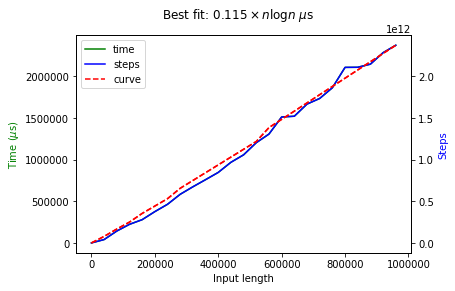

In [67]:
def pythonsort(L): return sorted(L)
timer(pythonsort,genintlist(1000000),usesteps=False);

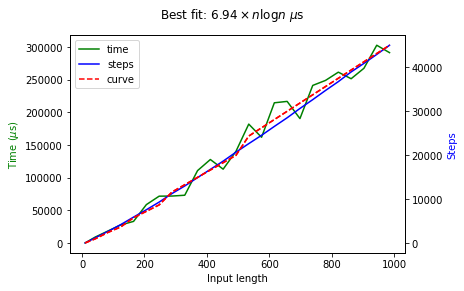

In [40]:
timer(mergesort,genintlist(1000));

Python `sorted` is also $O(n \log_2 n)$ but about $100$ times faster!

Why did I teach you sorting?

# Storing data

## Array (Python List)

Conecutive section of memory

__Operations:__ <br>
1) Allocate array of length $n$: `L = [0]*n`  $O(n)$ <br>
2) Set item at location $i$ to value $v$: `L[i] = v` $O(1)$ <br>
3) Get item at location $i$: `a = L[i]` $O(1)$.

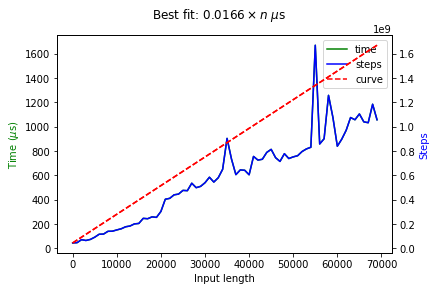

In [87]:
def t(n): return [0]*n

timer(t,range(10,70000,1000), inlen = lambda x:x , usesteps= False);

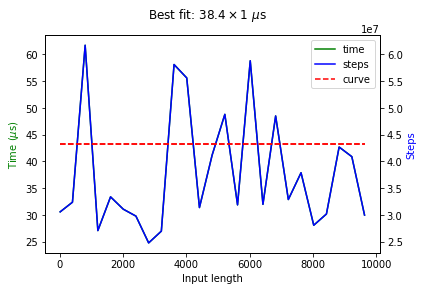

In [91]:
def t(L): 
    m = int(len(L)/2)
    return L[m]
timer(t,genintlist(10000), usesteps= False);

__Python extras:__ <br>
1) Length `len(L)` $O(1)$ <br>
2) Append `L.append(x)` $O(1)$ <br>
3) Remove last `L.pop()` $O(1)$ <br>
4) Slicing `L[i:j]` $O(n)$ <br>
5) Concatenation `L1 + L2` $O(n+m)$ <br>
6) Reversing `L[::-1]` $O(n)$

In [147]:
# What's time complexity of f?
def f(L):
    for i in range(len(L)):
        if L[i] != 10:
            L[i] = 10
    return L

In [151]:
# What's the time complexity of g?
def g(L):
    for i in range(len(L)):
        if L[i] != 10:
            L = L[:i]+[10]+L[i+1:]
    return L

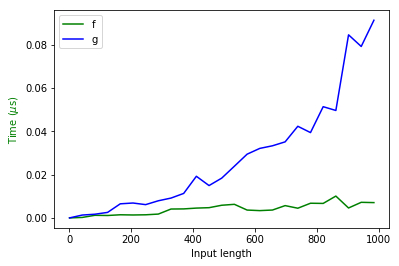

In [152]:
compare_times(f,g,genintlist(1000,100))

## Dictionaries

In [3]:
teams = {"Alexis Sanchez" : "Arsenal","Mesut Ozil" : "Arsenal","Petr Cech" : "Arsenal","Theo Walcott" : "Arsenal","Laurent Koscielny" : "Arsenal","Hector Bellerin" : "Arsenal","Olivier Giroud" : "Arsenal","Nacho Monreal" : "Arsenal","Shkodran Mustafi" : "Arsenal","Alex Iwobi" : "Arsenal","Granit Xhaka" : "Arsenal","Alex Oxlade-Chamberlain" : "Arsenal","Jack Wilshere" : "Arsenal","Aaron Ramsey" : "Arsenal","Francis Coquelin" : "Arsenal","Gabriel Paulista" : "Arsenal","Kieran Gibbs" : "Arsenal","Santi Cazorla" : "Arsenal","Danny Welbeck" : "Arsenal","Rob Holding" : "Arsenal","Mohamed Elneny" : "Arsenal","Lucas Perez" : "Arsenal","Emiliano Martinez" : "Arsenal","David Ospina" : "Arsenal","Carl Jenkinson" : "Arsenal","Per Mertesacker" : "Arsenal","Sead Kolasinac" : "Arsenal","Alexandre Lacazette" : "Arsenal","Eden Hazard" : "Chelsea","Diego Costa" : "Chelsea","Gary Cahill" : "Chelsea","Marcos Alonso Mendoza" : "Chelsea","Cesar Azpilicueta" : "Chelsea","Pedro" : "Chelsea","Thibaut Courtois" : "Chelsea","David Luiz" : "Chelsea","Cesc Fabregas" : "Chelsea","Willian" : "Chelsea","Victor Moses" : "Chelsea","Nemanja Matic" : "Chelsea","N%27Golo Kante" : "Chelsea","Willy Caballero" : "Chelsea","Michy Batshuayi" : "Chelsea","Kurt Zouma" : "Chelsea","Kenedy" : "Chelsea","Eduardo Carvalho" : "Chelsea","Antonio Rudiger" : "Chelsea","Tiemoue Bakayoko" : "Chelsea","Roberto Firmino" : "Liverpool","Philippe Coutinho" : "Liverpool","Sadio Mane" : "Liverpool","Georginio Wijnaldum" : "Liverpool","James Milner" : "Liverpool","Adam Lallana" : "Liverpool","Nathaniel Clyne" : "Liverpool","Simon Mignolet" : "Liverpool","Dejan Lovren" : "Liverpool","Emre Can" : "Liverpool","Joel Matip" : "Liverpool","Divock Origi" : "Liverpool","Jordan Henderson" : "Liverpool","Daniel Sturridge" : "Liverpool","Lucas Leiva" : "Liverpool","Ragnar Klavan" : "Liverpool","Mamadou Sakho" : "Liverpool","Loris Karius" : "Liverpool","Trent Alexander-Arnold" : "Liverpool","Alberto Moreno" : "Liverpool","Ben Woodburn" : "Liverpool","Marko Grujic" : "Liverpool","Joe Gomez" : "Liverpool","Sheyi Ojo" : "Liverpool","Mohamed Salah" : "Liverpool","Danny Ings" : "Liverpool","Dominic Solanke" : "Liverpool","Romelu Lukaku" : "Manchester United","David de Gea" : "Manchester United","Antonio Valencia" : "Manchester United","Paul Pogba" : "Manchester United","Eric Bailly" : "Manchester United","Juan Mata" : "Manchester United","Daley Blind" : "Manchester United","Ander Herrera" : "Manchester United","Anthony Martial" : "Manchester United","Marcos Rojo" : "Manchester United","Marcus Rashford" : "Manchester United","Henrikh Mkhitaryan" : "Manchester United","Matteo Darmian" : "Manchester United","Jesse Lingard" : "Manchester United","Phil Jones" : "Manchester United","Chris Smalling" : "Manchester United","Marouane Fellaini" : "Manchester United","Luke Shaw" : "Manchester United","Michael Carrick" : "Manchester United","Ashley Young" : "Manchester United","Sergio Romero" : "Manchester United","Axel Tuanzebe" : "Manchester United","Timothy Fosu-Mensah" : "Manchester United","Joel Castro Pereira" : "Manchester United","Victor Lindelof" : "Manchester United"}

In [4]:
players = list(teams.keys())

In [5]:
team_list = [ k+":"+teams[k] for k in teams];

Suppose we want to be able to store player and team data so we can do things like

In [156]:
teams["Alexis Sanchez"]

'Arsenal'

__Option 1:__ Store teams in list of strings `player:team`. Scan list to find the team for player

In [68]:
team_list

['Alexis Sanchez:Arsenal',
 'Mesut Ozil:Arsenal',
 'Petr Cech:Arsenal',
 'Theo Walcott:Arsenal',
 'Laurent Koscielny:Arsenal',
 'Hector Bellerin:Arsenal',
 'Olivier Giroud:Arsenal',
 'Nacho Monreal:Arsenal',
 'Shkodran Mustafi:Arsenal',
 'Alex Iwobi:Arsenal',
 'Granit Xhaka:Arsenal',
 'Alex Oxlade-Chamberlain:Arsenal',
 'Jack Wilshere:Arsenal',
 'Aaron Ramsey:Arsenal',
 'Francis Coquelin:Arsenal',
 'Gabriel Paulista:Arsenal',
 'Kieran Gibbs:Arsenal',
 'Santi Cazorla:Arsenal',
 'Danny Welbeck:Arsenal',
 'Rob Holding:Arsenal',
 'Mohamed Elneny:Arsenal',
 'Lucas Perez:Arsenal',
 'Emiliano Martinez:Arsenal',
 'David Ospina:Arsenal',
 'Carl Jenkinson:Arsenal',
 'Per Mertesacker:Arsenal',
 'Sead Kolasinac:Arsenal',
 'Alexandre Lacazette:Arsenal',
 'Eden Hazard:Chelsea',
 'Diego Costa:Chelsea',
 'Gary Cahill:Chelsea',
 'Marcos Alonso Mendoza:Chelsea',
 'Cesar Azpilicueta:Chelsea',
 'Pedro:Chelsea',
 'Thibaut Courtois:Chelsea',
 'David Luiz:Chelsea',
 'Cesc Fabregas:Chelsea',
 'Willian:Chelsea

In [ ]:
def split(s):
    for i in range(len(s)):
        if s[i]==":": 
            return s[:i],s[i+1:]
        
split("Alex Iwobi:Arsenal") # consider O(1)
# O(s)

In [42]:
def get_team(player,team_list):
    # ALT: for i in range(len(team_list))
    #          s = team_list[i]
    for s in team_list:
        # s is a constant
        player_,team = split(s)
        if player==player_: return team
    return "Not found"

# t = len(team_list)
# num steps: t + t*constant
# O(t) + s * O(t) -> O(t)
# O(len(team_list)) --- O(n^2)?

In [159]:
get_team("Boaz Barak",team_list)

'Not found'

__Question:__ What is the runtime of `get_team`?

__Option 2:__ Use _sorted_ array and use _binary search_ to find player.

Running time to _find_ player: $O(\log n)$.

Running time to _add_ player: $O(n)$ (find right location - $O(\log n)$, insert it there $O(n)$ )

# Dictionaries

This kind of tasks - storing information that you want to access using some _key_, is so common that python has a special data structure for it called a __dictionary__

### Are dictionaries implemented using just python lists (aka arrays)?

Too slow

__Two main solutions:__ _Binary search trees_ and _hash tables_.

Python  uses hash tables and this is what we explain next.

## Summary of data structures

Often the right data structure can make all the difference:


|Data structure|Get(key).... |Set(key).... |Other properties              |
|--------------|-------------|-------------|------------------------------|
|Unsorted array|$O(n)$          |$O(1)$     | Supports any objects         |
|Sorted array  |$O(\log n)$     |$O(n)$          | Supports range queries       |
|Search trees  |$O(\log n)$     |$O(\log n)$     | Support range queries        |
|Hash table    |$O(1)$        |$O(1)$        | Supports non-comparable keys |


__Note:__ Data structures is a _huge_ topic and if you study more computer science you will hear about many more data structures 

## Dictionaries in Python

In [160]:
D = {}
D["Alexis Sanchez"] = "Arsenal"
D["Mesut Ozil"] =     "Arsenal"
D["Joel Castro Pereira"] = "Manchester United" 
D["Victor Lindelof"] =  "Manchester United"
D["Victor Lindelof"]

'Manchester United'

In [161]:
D["Mesut Ozil"]

'Arsenal'

In [164]:
D["Mesut Ozil"] = "Liverpool"
D["Mesut Ozil"]

'Liverpool'

In [165]:
D["Boaz Barak"] = "Manchester United"
print(D)

{'Alexis Sanchez': 'Arsenal', 'Mesut Ozil': 'Liverpool', 'Joel Castro Pereira': 'Manchester United', 'Victor Lindelof': 'Manchester United', 'Boaz Barak': 'Manchester United'}


In [166]:
D["Boaz Barak"]

'Manchester United'

In [167]:
D = {'Alexis Sanchez': 'Arsenal', 
 'Mesut Ozil': 'Arsenal', 
 'Joel Castro Pereira': 'Manchester United', 
 'Victor Lindelof': 'Manchester United', 
 'Boaz Barak': 'Manchester United'}

D["Alexis Sanchez"]

'Arsenal'

In [168]:
D["Jelani Nelson"]

KeyError: 'Jelani Nelson'

In [171]:
"Alexis Sanchez" in D

True

`DICT[`_key_`] = `_value_ <br>

__Keys of dictionaries:__ Can be _strings_ or _numbers_ (or more..)

__Values:__ Can be anything (strings, numbers, lists, lists of lists, etc..)

__Python dictionary operations:__ <br>
1) Get value by key: `var = D[key]` $O(1)$ <br>
2) Set value by key  `D[key] = value` $O(1)$ <br>
3) Check membership `key in D` $O(1)$ <br>
4) Enumerate over all keys `for key in D` $O(n)$ <br>

In [98]:
def gendictionaryinput(n):
    return ({ randomstring() : randomstring() for i in range(n) }, randomstring())
def mylen(T): return len(T[0].keys())

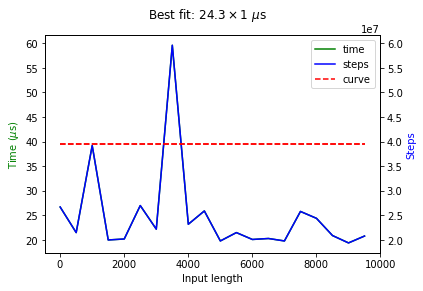

In [108]:
def t(D,s): return s in D
timer(t,(gendictionaryinput(n) for n in range(10,10000,500)), inlen = mylen, usesteps=False);

__Example:__ Write function `countletters(s)` that takes as input a string `s` and prints number of times each character appears in `s`

In [60]:
def countletters(s):
    D = {}
    for i in range(len(s)):
        c = s[i]
        if c in D:
            D[c] += 1
        else:
            D[c] = 1
    for letter in D:
        print(f"{letter} appears {D[letter]} times")

In [79]:
constitution = "we the nations nationalities and peoples of ethiopia: strongly committed in full and free exercise of our right to self determination to building a political community founded on the rule of law and capable of ensuring a lasting peace guaranteeing a democratic order and advancing our economic and social development firmly convinced that the fulfillment of this objective requires full respect of individual and peoples fundamental freedoms and rights to live together on the basis of equality and without any sexual religious or cultural discrimination further convinced that by continuing to live with our rich and proud cultural legacies in territories we have long inhabited have through continuous interaction on various levels and forms of life built up common interest and have also contributed to the emergence of a common outlook fully cognizant that our common destiny can best be served by rectifying historically unjust relationships and by further promoting our shared interests convinced that to live as one economic community is necessary in order to create sustainable and mutually supportive conditions for ensuring respect for our rights and freedoms and for the collective promotion of our interests determined to consolidate as a lasting legacy the peace and the prospect of a democratic order which our struggles and sacrifices have brought about have therefore adopted on 8 december 1994 this constitution through representatives we have duly elected for this purpose as an instrument that binds us in a mutual commitment to fulfil the objectives and the principles set forth above "

In [172]:
countletters(constitution)

w appears 7 times
e appears 149 times
  appears 250 times
t appears 125 times
h appears 47 times
n appears 105 times
a appears 93 times
i appears 109 times
o appears 119 times
s appears 73 times
l appears 62 times
d appears 55 times
p appears 27 times
f appears 37 times
: appears 1 times
r appears 87 times
g appears 27 times
y appears 17 times
c appears 61 times
m appears 36 times
u appears 61 times
x appears 2 times
b appears 19 times
v appears 24 times
j appears 3 times
q appears 2 times
k appears 1 times
z appears 1 times
8 appears 1 times
1 appears 1 times
9 appears 2 times
4 appears 1 times


In [ ]:
def countletters(s):
    D = {}
    for i in range(len(s)):
        c = s[i]
        if c in D:
            D[c] += 1
        else:
            D[c] = 1
    for letter in D:
        print(f"{letter} appears {D[letter]} times")

## Summary of data structures

Often the right data structure can make all the difference:


|Data structure|Get(key).... |Set(key).... |Other properties              |
|--------------|-------------|-------------|------------------------------|
|Unsorted array|$O(n)$          |$O(1)$     | Supports any objects         |
|Sorted array  |$O(\log n)$     |$O(n)$          | Supports range queries       |
|Search trees  |$O(\log n)$     |$O(\log n)$     | Support range queries        |
|Hash table    |$O(1)$        |$O(1)$        | Supports non-comparable keys |


__Note:__ Data structures is a _huge_ topic and if you study more computer science you will hear about many more data structures 